In [9]:
import numpy as np
import matplotlib.pyplot as plt

n = 3000
m = 30
# La matrice A deve essere mal condizionata, che segue una modellizzazione lineare
A = np.random.normal(loc=0, scale=1, size=(n, m))
x = np.random.rand(m, 1)
y = A @ x

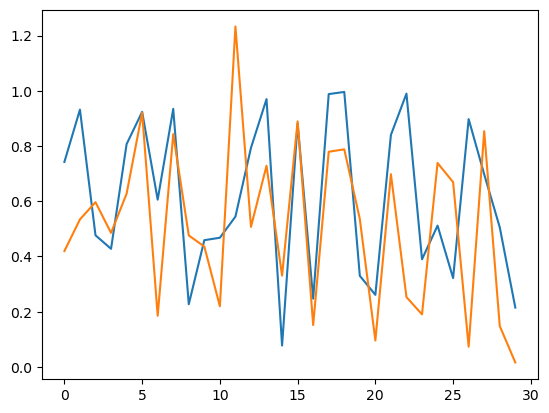

In [10]:

rng = np.random.default_rng()
delta = rng.normal(0, 0.01, (n, 1))
y_noisy = y + delta

U, s, VT = np.linalg.svd(A, full_matrices=False)
x_calc = np.zeros((m, 1))
g = np.zeros([m, 1])
k = np.linalg.matrix_rank(A)
for i in range(25):
    g[i, :] = (U[:, i].T @ y_noisy) / s[i]

for i in range(m):
    x_calc[i, :] = VT[:, i].T @ g


plt.plot(x)
plt.plot(x_calc)
plt.show()

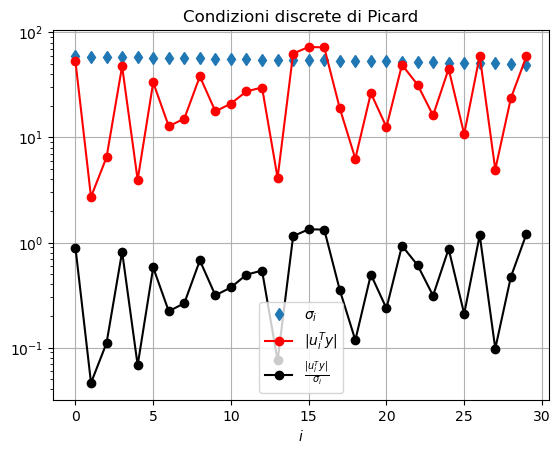

In [11]:
# Visualizzazione condizioni di Picard per y con rumore (y_delta)
uTy = np.abs(U.T @ y_noisy)
pic_coeff = (uTy.T / s).T
plt.semilogy(s, "d")
plt.semilogy(uTy, "ro-")
plt.semilogy(pic_coeff, "ko-")
plt.legend([r"$\sigma_i$", r"$| u_i^T y |$", r"$\frac{| u_i^T y |}{\sigma_i}$"])
plt.xlabel(r"$i$")
plt.title("Condizioni discrete di Picard")
plt.grid()
plt.show()

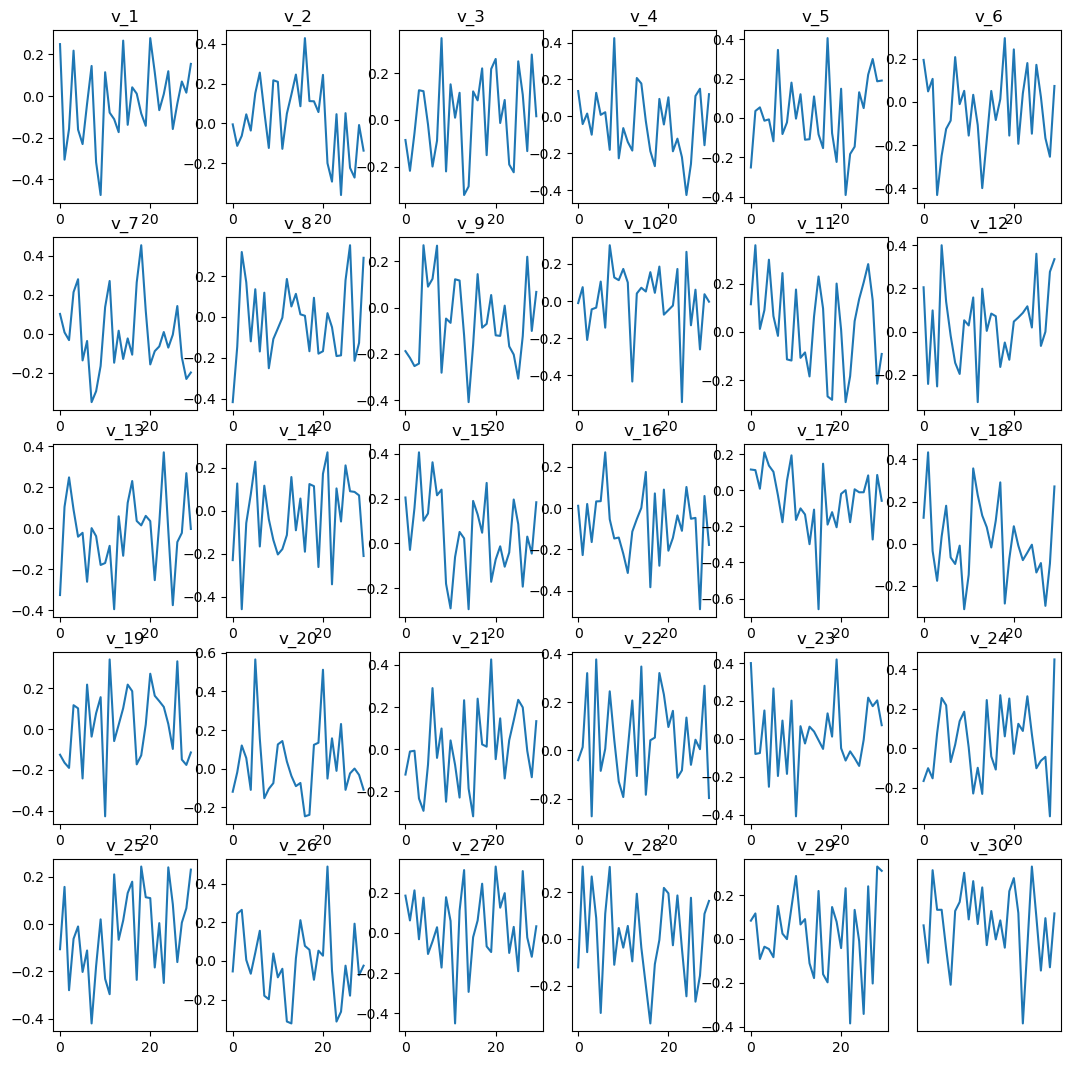

In [12]:
# Visualizzazione vettori v_i. Perche non oscillano??
plt.figure(figsize=(13, 13))
for i in range(VT.shape[0]):
    plt.subplot(5, 6, i+1)
    plt.plot(VT[i, :])
    plt.title(f"v_{i+1}")
plt.xticks([])
plt.yticks([])
plt.grid()
plt.show()